In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
Test = pd.read_csv('test.csv')
Train = pd.read_csv('train.csv')

Train = Train.select_dtypes(exclude=['object'])

#Take last 460 sales price from train data
Train_2 = Train.iloc[-460:,:]
Actual = Train_2['SalePrice']

Train = Train[0:1000]

#remove non numerical from test
Test = Test.select_dtypes(exclude=['object'])


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,460.000000,460.000000,374.000000,460.000000,460.000000,460.000000,460.000000,460.000000,458.000000,460.000000,...,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,1230.500000,56.934783,70.259358,10137.810870,6.043478,5.550000,1970.473913,1983.967391,91.661572,440.217391,...,472.176087,87.486957,44.467391,23.130435,2.771739,15.073913,6.234783,39.369565,6.354348,2007.784783
std,132.934821,42.442529,26.552888,5742.968834,1.382375,1.122022,30.640323,21.137918,162.355140,485.034721,...,224.326058,127.246479,62.339231,62.078280,25.519399,56.442762,60.252277,425.963261,2.733334,1.331448
min,1001.000000,20.000000,21.000000,1477.000000,2.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1115.750000,20.000000,58.250000,7500.000000,5.000000,5.000000,1950.000000,1965.750000,0.000000,0.000000,...,311.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1230.500000,50.000000,68.000000,9511.500000,6.000000,5.000000,1971.000000,1992.000000,0.000000,376.500000,...,472.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1345.250000,70.000000,80.000000,11500.000000,7.000000,6.000000,2000.000000,2004.000000,145.000000,694.750000,...,573.750000,161.250000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,63887.000000,10.000000,9.000000,2009.000000,2009.000000,1378.000000,5644.000000,...,1418.000000,736.000000,547.000000,330.000000,304.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000


In [6]:
#Fill NA with mean of column in train
Train = Train.fillna(Train.mean())


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,56.880000,69.95526,10691.176000,6.125000,5.587000,1971.633000,1985.279000,109.225352,445.214000,...,97.353000,47.669000,21.413000,3.703000,15.055000,1.160000,45.384000,6.307000,2007.830000,182284.451000
std,288.819436,42.256375,21.09821,11412.668294,1.383217,1.108901,30.007945,20.412296,188.317777,442.394927,...,124.392314,67.988557,60.696528,30.915733,55.467744,26.103329,525.449337,2.691095,1.326974,80291.215207
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,250.750000,20.000000,60.00000,7585.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,500.500000,50.000000,69.95526,9451.000000,6.000000,5.000000,1974.000000,1994.000000,0.000000,384.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,750.250000,70.000000,79.00000,11628.500000,7.000000,6.000000,2000.250000,2004.000000,174.000000,725.000000,...,171.250000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1000.000000,190.000000,313.00000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
corr = Train.corr()
cols = corr["SalePrice"].sort_values(ascending = False)[0:5].index
cols = cols.tolist()
cols

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

In [8]:
X = Train[cols]
Y = Train['SalePrice']
X = X.drop(['SalePrice'], axis=1)

In [9]:
lr1 = LinearRegression()
model = lr1.fit(X,Y)
pred = model.predict(X)
model.score(X,Y)

0.7600572914182073

In [10]:
#Remove SalePrice from cols
cols2 = cols[1:5]
cols2

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

In [11]:
#Remove first item in list
Test = Test[cols2]

Y_Pred = model.predict(Test)

In [12]:
Actual = pd.DataFrame(Actual)

In [13]:
#Add np.array to dataframe
Actual['Predicted'] = np.array(Y_Pred)


In [16]:
#Add column with percent difference
Actual['Percent Difference'] = (Actual['SalePrice'] - Actual['Predicted'])/Actual['SalePrice']


In [42]:
#RMSE from sklearn
RMSE = mean_squared_error(Actual['SalePrice'], Actual['Predicted'], squared=False)
Normalized_RMSE = RMSE/(Actual['SalePrice'].max() - Actual['SalePrice'].min())

In [43]:
print('RMSE: ', RMSE)
print('Normalized RMSE: ', Normalized_RMSE)

RMSE:  43250.32478556543
Normalized RMSE:  0.06245534265063601


In [34]:
#Remove Outliers from Train
for i in cols:
    q1 = Train[i].quantile(0.25)
    q3 = Train[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    Train_2 = Train[(Train[i] > lower) & (Train[i] < upper)]

Train_2.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.00000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,500.507071,57.050505,69.754808,10660.164646,6.102020,5.592929,1971.295960,1985.073737,106.069043,443.155556,...,96.79899,47.089899,21.411111,3.740404,15.013131,1.171717,45.842424,6.305051,2007.830303,180399.129293
std,289.310976,42.387512,21.009551,11461.216766,1.367208,1.112913,29.967092,20.407666,183.563774,436.767550,...,124.55514,67.735695,60.653616,31.069385,55.444183,26.234703,528.079206,2.685744,1.328497,77752.540896
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,250.250000,20.000000,60.000000,7545.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,500.500000,50.000000,69.955260,9391.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,385.500000,...,0.00000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162700.000000
75%,750.750000,70.000000,78.000000,11600.000000,7.000000,6.000000,2000.000000,2003.000000,169.750000,719.750000,...,168.75000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.00000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


In [28]:
lr3 = LinearRegression()
model3 = lr3.fit(Train_2[cols2],Train_2['SalePrice'])
pred3 = model3.predict(Train_2[cols2])
model3.score(Train_2[cols2],Train_2['SalePrice'])

0.7567399118824809

In [31]:
#Test on test data
Y_Pred2 = model3.predict(Test)


In [40]:
RMSE2 = mean_squared_error(Actual['SalePrice'], Y_Pred2, squared=False)
Normalized_RMSE2 = RMSE2/(Actual['SalePrice'].max() - Actual['SalePrice'].min())

In [41]:
#Print RMSE and Nrmlized RMSE
print('RMSE = ', RMSE2)
print('Normalized RMSE = ', Normalized_RMSE2)

RMSE =  42831.80329257999
Normalized RMSE =  0.06185097948387003


In [44]:
## Add to Actual dataframe
Actual['Predicted2'] = np.array(Y_Pred2)
Actual['Percent difference'] = (Actual['SalePrice'] - Actual['Predicted2'])/Actual['SalePrice']
Actual

,SalePrice,Predicted,Percent Difference,Predicted2,Percent difference
1000,82000,72234.570366,0.119091,73075.479339,0.108836
1001,86000,86691.052986,-0.008035,88410.441021,-0.028028
1002,232000,263502.557869,-0.135787,261492.030869,-0.127121
1003,136905,166263.685853,-0.214446,165889.742232,-0.211714
1004,181000,204492.156577,-0.129791,204629.369958,-0.130549
...,...,...,...,...,...
1455,175000,186096.170713,-0.063407,186319.924707,-0.064685
1456,210000,212652.849141,-0.012633,211987.451411,-0.009464
1457,266500,234057.698005,0.121735,233259.869864,0.124728
1458,142125,109928.607229,0.226536,110989.920597,0.219068


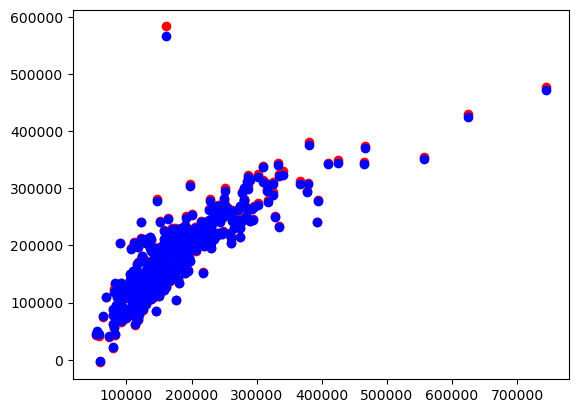

In [46]:
#Plot Actual vs predicted and predicted2 
plt.plot(Actual['SalePrice'], Actual['Predicted'], 'ro')
plt.plot(Actual['SalePrice'], Actual['Predicted2'], 'bo')
plt.show()
